In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.interpolate import make_interp_spline

In [2]:
def smooth(data, val = 1):
    out = np.zeros_like(data)
    
    if val == 0 :
        return data
    
    for i in range(data.shape[0]):
        for j in range(i-val, i+val):
            if j < 0 :
                out[i] += data[0]
            elif (j > data.shape[0] - 1):
                out[i] += data[data.shape[0] - 1]
            else:
                out[i] += data[j]
        out[i] = out[i] / (val*2 + 1)
    return out

In [3]:
def plot_data(data1, data2, label1 = '1', label2 = '2', xLabel = 'xLabel', yLabel = 'yLabel', smooth_ = 7, tik = True):
    # plt.style.use('default')
    plt.style.use('seaborn-ticks')
    plt.rcParams['font.family'] = 'Times New Roman'
    
    plt.plot(data1[1:,1].astype(int), smooth(data1[1:, 2].astype(float), smooth_) , color = 'b', label=label1)
    plt.plot(data1[1:,1].astype(int), data1[1:, 2].astype(float), color = 'b', alpha = 0.15, linewidth = 3)

    plt.plot(data2[1:,1].astype(int), smooth(data2[1:, 2].astype(float), smooth_) , color = 'r', label=label2)
    plt.plot(data2[1:,1].astype(int), data2[1:, 2].astype(float), color = 'r', alpha = 0.15, linewidth = 3)
    
    ticks = np.arange(0, 1000001, 100000)
    plt.xticks(ticks, (ticks/100000).astype(int))

    plt.xlabel(xLabel, labelpad = 12 , size = 18)
    plt.ylabel(yLabel, labelpad = 10 , size = 18)
    
    
#     plt.legend(loc = 'best', fontsize = 18, frameon=True, shadow=True)
    

In [18]:
data1 = np.array([])
with open('data path', newline = '') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        data1 = np.append(data1, row)
data1 = data1.reshape(-1,3) #csv shape


In [5]:
data2 = np.array([])
with open('data path', newline = '') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        data2 = np.append(data2, row)
data2 = data2.reshape(-1,3)

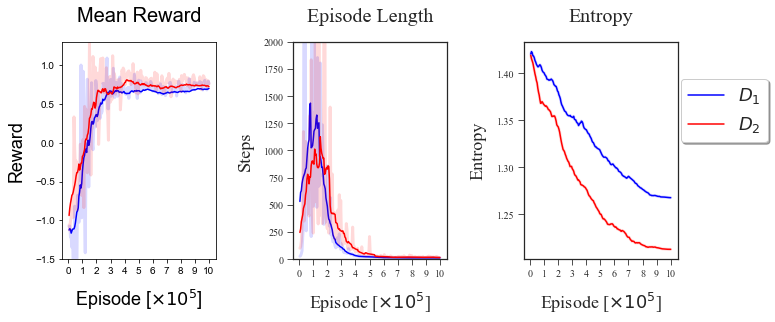

In [10]:
label1 = r'$D_{1}$'
label2 = r'$D_{2}$'
xLabel = r'xLabel'
yLabel = 'yLabel'

smooth__ = 7
save = True
name = 'fig1'

fig = plt.figure()
axes = fig.subplots(nrows = 1, ncols = 2)

plt.title('title', loc = 'center', pad = 20, size = 20)
plot_data(data1, data2, label1, label2, xLabel, yLabel, smooth_ = smooth__)
plt.legend()

# plt.legend(loc = 'lower right', bbox_to_anchor = (1.78, 0.5), bbox_transform=fig.transFigure, fontsize = 18, frameon=True, shadow=True)
# plt.subplots_adjust(right = 1.55, wspace=0.5, hspace=0.1)

if save:
    plt.savefig(name, dpi=300, bbox_inches = 'tight', pad_inches = 0.2)
plt.show()